<a href="https://colab.research.google.com/github/FerPaye01/Challenge-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos

Los datos de cada tienda están disponibles en archivos CSV y se cargarán utilizando el código base ya proporcionado. El código extrae información de las cuatro tiendas y organiza los datos en DataFrames utilizando la biblioteca Pandas.

Detalles importantes:



*   Código base: Ya está listo para extraer y organizar los datos correctamente, recomendamos no modificarlo.

*   Los datos se almacenan en DataFrames: cada tienda tiene su propio conjunto de datos (store1, store2, store3 y store4), y debes usarlos para los siguientes pasos del desafío.




In [276]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Estructura de datos:
El conjunto de datos incluye la siguiente información:

```
Producto y Categoría: Artículos vendidos y sus calificaciones.
Precio y Envío: Valores de venta y costos asociados.
Fecha y ubicación de compra: Información temporal y geográfica.
Evaluación de compra: Comentarios de clientes.
Tipo de Pago y Cuotas: Métodos utilizados por los clientes.
Coordenadas Geográficas: Ubicación de las transacciones
```



In [277]:
type(tienda)

pandas.core.frame.DataFrame

In [278]:
print(tienda.keys())

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [279]:
print(tienda['Producto'])

0       Asistente virtual
1         Mesa de comedor
2           Juego de mesa
3              Microondas
4        Silla de oficina
              ...        
2354            Iphone 15
2355            Impresora
2356        Juego de mesa
2357             Cama box
2358           Smartwatch
Name: Producto, Length: 2359, dtype: object


In [280]:

datos_dict = tienda.to_dict(orient='records')


### Informe Final: Análisis para la Selección de Tienda para el Sr. Juan
## Introducción

El presente informe tiene como objetivo analizar los datos de ventas, categorías de productos, calificaciones de clientes y costos de envío de diferentes tiendas para determinar cuál es la más adecuada para que el Sr. Juan enfoque sus ventas. Se considerarán múltiples factores para tomar una decisión informada que maximice ingresos y minimice costos, además de garantizar una experiencia positiva para los clientes.

## Desarrollo

#1. Análisis de facturación



El análisis de facturación muestra que Bogotá es la tienda con mayor ingreso total, seguida de Medellín y Cali. Estas tres tiendas concentran una gran parte de las ventas y facturación, representando casi el 77% del total. Esto indica un mercado más sólido y mayor volumen de ventas en estas localidades.

In [281]:
try:
    facturacion = {
        lugar: sum(venta['Precio'] for venta in datos_dict if venta['Lugar de Compra'] == lugar)
        for lugar in lugares
    }
    facturacion_ordenada = dict(sorted(facturacion.items(), key=lambda x: x[1], reverse=True))
except Exception as e:
    print(f"Error calculando facturación: {e}")
else:
    print("1. Facturación total por tienda (mayor a menor):")
    for tienda, total in facturacion_ordenada.items():
        print(f"{tienda}: {total}")
    print()

1. Facturación total por tienda (mayor a menor):
Bogotá: 440005000.0
Medellín: 296858100.0
Cali: 154493700.0
Pereira: 56214300.0
Cúcuta: 37879500.0
Barranquilla: 32907700.0
Cartagena: 22296700.0
Riohacha: 18512700.0
Bucaramanga: 17579200.0
Pasto: 14996400.0
Leticia: 14669800.0
Santa Marta: 13198300.0
Manizales: 8027600.0
Villavicencio: 7161900.0
Armenia: 4615700.0
Soacha: 4126000.0
Neiva: 3494000.0
Inírida: 2722500.0
Valledupar: 1121300.0



In [282]:
tiendas_fact = list(facturacion_ordenada.keys())
valores_fact = list(facturacion_ordenada.values())


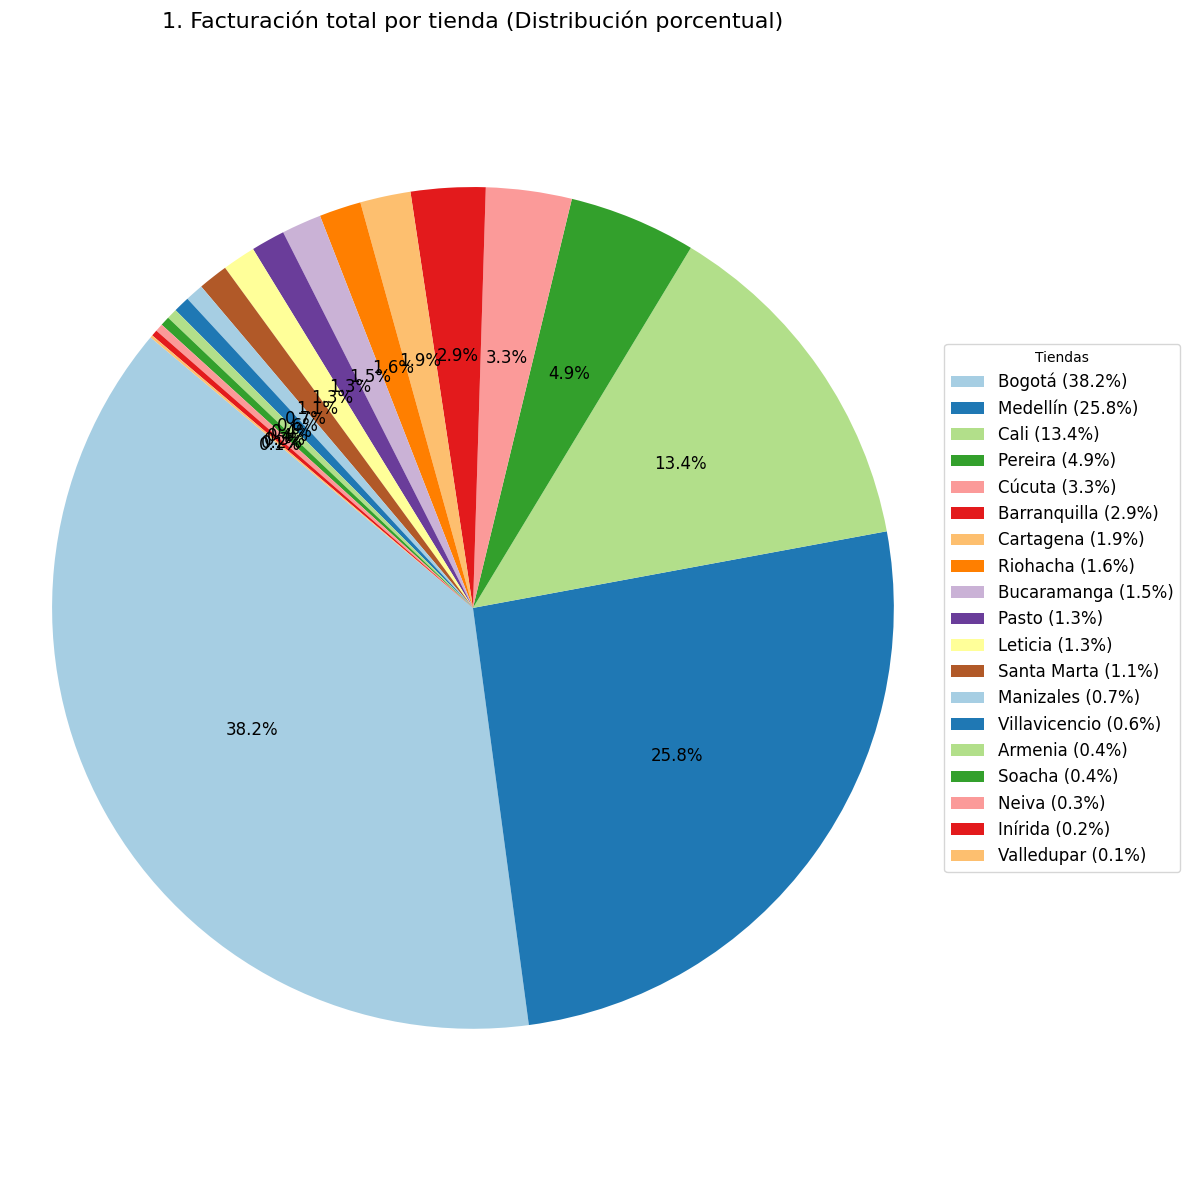

In [283]:
plt.figure(figsize=(12,12))
wedges, texts, autotexts = plt.pie(
    valores_fact,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

etiquetas_leyenda = [f"{tienda} ({valor / sum(valores_fact) * 100:.1f}%)" for tienda, valor in zip(tiendas_fact, valores_fact)]

plt.legend(
    wedges,
    etiquetas_leyenda,
    title="Tiendas",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.title('1. Facturación total por tienda (Distribución porcentual)', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

Las categorías con mayor volumen de ventas varían según la tienda. Por ejemplo:

*   Bogotá y Pereira destacan en la categoría de Muebles.
*   Medellín y Cali lideran en Electrónicos.
*   Otras tiendas tienen categorías más dispersas, con menos ventas significativas.

Este patrón indica que las preferencias de producto están regionalizadas, y que para maximizar ventas, el Sr. Juan debe considerar qué categoría priorizar según la tienda.

In [284]:
try:
    categorias_por_tienda = {
        tienda: {
            cat: sum(1 for venta in datos_dict if venta['Lugar de Compra'] == tienda and venta['Categoría del Producto'] == cat)
            for cat in set(v['Categoría del Producto'] for v in datos_dict if v['Lugar de Compra'] == tienda)
        }
        for tienda in lugares
    }

    categorias_ordenadas = dict(
        sorted(categorias_por_tienda.items(), key=lambda item: max(item[1].values()), reverse=True)
    )

except Exception as e:
    print(f"Error calculando categorías populares: {e}")
else:
    print("2. Categorías más populares por tienda (ordenadas por popularidad):")
    for tienda, categorias in categorias_ordenadas.items():
        max_ventas = max(categorias.values())
        populares = [cat for cat, cant in categorias.items() if cant == max_ventas]
        print(f"{tienda}: {populares} con {max_ventas} ventas")
    print()


2. Categorías más populares por tienda (ordenadas por popularidad):
Bogotá: ['Muebles'] con 195 ventas
Medellín: ['Electrónicos'] con 123 ventas
Cali: ['Electrónicos'] con 67 ventas
Pereira: ['Muebles'] con 31 ventas
Barranquilla: ['Electrónicos'] con 14 ventas
Cúcuta: ['Electrónicos', 'Muebles'] con 13 ventas
Riohacha: ['Electrónicos'] con 12 ventas
Cartagena: ['Muebles'] con 11 ventas
Leticia: ['Electrodomésticos'] con 9 ventas
Bucaramanga: ['Juguetes'] con 8 ventas
Santa Marta: ['Artículos para el hogar', 'Muebles'] con 6 ventas
Pasto: ['Electrodomésticos', 'Deportes y diversión'] con 5 ventas
Villavicencio: ['Muebles'] con 4 ventas
Manizales: ['Electrónicos', 'Muebles'] con 4 ventas
Armenia: ['Muebles'] con 4 ventas
Neiva: ['Muebles'] con 3 ventas
Valledupar: ['Muebles'] con 2 ventas
Inírida: ['Instrumentos musicales'] con 2 ventas
Soacha: ['Deportes y diversión', 'Electrónicos'] con 2 ventas



In [285]:
tiendas_cat = []
categorias = []
ventas_cat = []

for tienda, cats in categorias_ordenadas.items():
    max_ventas = max(cats.values())
    cat = [c for c, v in cats.items() if v == max_ventas][0]
    tiendas_cat.append(tienda)
    categorias.append(cat)
    ventas_cat.append(max_ventas)

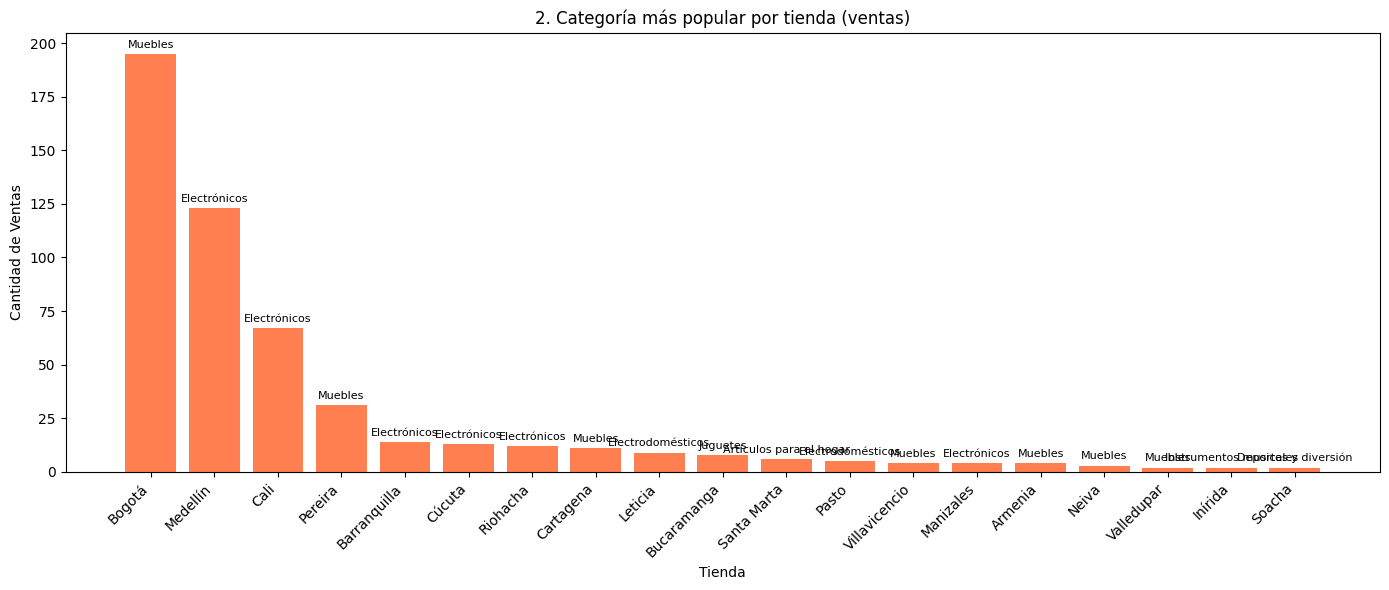

In [286]:
plt.figure(figsize=(14,6))
bars = plt.bar(tiendas_cat, ventas_cat, color='coral')
plt.title('2. Categoría más popular por tienda (ventas)')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')

for bar, cat in zip(bars, categorias):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(ventas_cat)*0.01, cat, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Las tiendas presentan diferentes niveles de satisfacción del cliente. Tiendas con mejores calificaciones suelen tener mejor retención y fidelización, lo que es clave para ventas sostenibles. El Sr. Juan debe considerar esta métrica para no sólo vender más, sino también mantener una buena reputación.

In [287]:
try:
    promedios = {
        tienda: round(
            sum(venta['Calificación'] for venta in datos_dict if venta['Lugar de Compra'] == tienda) /
            sum(1 for venta in datos_dict if venta['Lugar de Compra'] == tienda),
            2
        )
        for tienda in lugares
    }
    promedios_ordenados = dict(sorted(promedios.items(), key=lambda x: x[1], reverse=True))
except Exception as e:
    print(f"Error calculando promedios: {e}")
else:
    print("3. Promedio de evaluación por tienda (mayor a menor):")
    for tienda, promedio in promedios_ordenados.items():
        print(f"{tienda}: {promedio}")
    print()

3. Promedio de evaluación por tienda (mayor a menor):
Soacha: 4.6
Neiva: 4.5
Bucaramanga: 4.39
Leticia: 4.16
Villavicencio: 4.09
Bogotá: 4.09
Pasto: 4.04
Cartagena: 4.04
Inírida: 4.0
Cali: 3.99
Pereira: 3.95
Cúcuta: 3.88
Medellín: 3.87
Manizales: 3.8
Santa Marta: 3.75
Barranquilla: 3.57
Riohacha: 3.45
Armenia: 3.36
Valledupar: 2.67



# 4. Productos más y menos vendidos

El análisis de productos indica que algunos artículos son consistentemente más populares, mientras otros apenas tienen demanda. Por ejemplo, en Bogotá, ciertos productos de Muebles son los más vendidos, mientras que otros tienen bajas ventas.

Esta información ayuda a optimizar el inventario y enfocarse en los productos que aseguran mayor rentabilidad.

In [288]:
try:
    productos_por_tienda = {
        tienda: {
            prod: sum(1 for venta in datos_dict if venta['Lugar de Compra'] == tienda and venta['Producto'] == prod)
            for prod in set(v['Producto'] for v in datos_dict if v['Lugar de Compra'] == tienda)
        }
        for tienda in lugares
    }
except Exception as e:
    print(f"Error calculando productos vendidos: {e}")
else:
    print("4. Productos más y menos vendidos por tienda:")
    for tienda in sorted(productos_por_tienda):
        productos = productos_por_tienda[tienda]
        max_ventas = max(productos.values())
        min_ventas = min(productos.values())
        mas_vendidos = [p for p, c in productos.items() if c == max_ventas]
        menos_vendidos = [p for p, c in productos.items() if c == min_ventas]
        print(f"{tienda}:")
        print(f"  Más vendidos: {mas_vendidos} con {max_ventas} ventas")
        print(f"  Menos vendidos: {menos_vendidos} con {min_ventas} ventas")
    print()

4. Productos más y menos vendidos por tienda:
Armenia:
  Más vendidos: ['Silla de oficina'] con 2 ventas
  Menos vendidos: ['Microondas', 'Bloques de construcción', 'Tablet ABXY', 'Vaso térmico', 'Carrito de control remoto', 'Modelado predictivo', 'Cubo mágico 8x8', 'Cubertería', 'Mesa de noche', 'Estufa', 'Impresora', 'Sofá reclinable'] con 1 ventas
Barranquilla:
  Más vendidos: ['Cubertería', 'Iniciando en programación'] con 4 ventas
  Menos vendidos: ['Bicicleta', 'Sofá reclinable', 'Cuerda para saltar', 'Guitarra acústica', 'Estufa', 'Dinosaurio Rex', 'Tablet ABXY', 'Lavadora de ropa', 'Cubo mágico 8x8', 'Refrigerador', 'Impresora', 'Smartwatch', 'Auriculares', 'Olla de presión', 'Sillón', 'Secadora de ropa'] con 1 ventas
Bogotá:
  Más vendidos: ['Vaso térmico'] con 30 ventas
  Menos vendidos: ['Auriculares con micrófono'] con 8 ventas
Bucaramanga:
  Más vendidos: ['Balón de baloncesto'] con 3 ventas
  Menos vendidos: ['Ciencia de datos con Python', 'Sillón', 'Guitarra acústica', '

# 5. Envío promedio por tienda

El costo de envío promedio varía considerablemente entre tiendas. Tiendas con costos de envío altos pueden afectar la competitividad del precio final para el consumidor y, por tanto, las ventas. Idealmente, el Sr. Juan debería enfocarse en tiendas que logren equilibrar buen volumen de ventas con costos de envío razonables.

In [289]:
# 5. Costo promedio de envío por tienda (de mayor a menor)
try:
    costo_envio_prom = {
        tienda: round(
            sum(venta['Costo de envío'] for venta in datos_dict if venta['Lugar de Compra'] == tienda) /
            sum(1 for venta in datos_dict if venta['Lugar de Compra'] == tienda),
            2
        )
        for tienda in lugares
    }

    # Ahora ordenado de mayor a menor costo
    costo_envio_ordenado = dict(sorted(costo_envio_prom.items(), key=lambda x: x[1], reverse=True))

except Exception as e:
    print(f"Error calculando costo promedio de envío: {e}")
else:
    print("5. Costo promedio de envío por tienda (mayor a menor):")
    for tienda, costo in costo_envio_ordenado.items():
        print(f"{tienda}: {costo}")
    print()


5. Costo promedio de envío por tienda (mayor a menor):
Soacha: 43420.0
Cúcuta: 40129.41
Pasto: 35078.26
Villavicencio: 34709.09
Neiva: 31516.67
Bucaramanga: 30587.1
Manizales: 29140.0
Cali: 28827.56
Inírida: 28460.0
Medellín: 28207.1
Leticia: 24450.0
Riohacha: 24357.5
Bogotá: 23815.85
Barranquilla: 23708.0
Cartagena: 22624.53
Santa Marta: 22593.75
Pereira: 22403.76
Valledupar: 18766.67
Armenia: 17314.29



In [290]:
tiendas_cal = list(promedios_ordenados.keys())
calificaciones = list(promedios_ordenados.values())
costos_envio = [costo_envio_prom[t] for t in tiendas_cal]  # aseguramos mismo orden


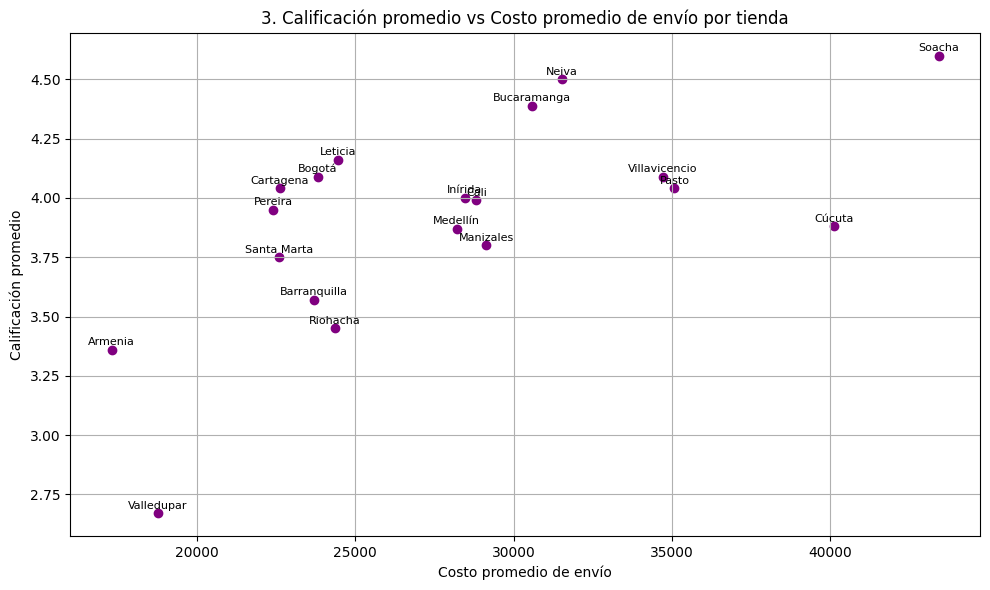

In [291]:
plt.figure(figsize=(10,6))
plt.scatter(costos_envio, calificaciones, color='purple')

for i, tienda in enumerate(tiendas_cal):
    plt.text(costos_envio[i], calificaciones[i]+0.02, tienda, fontsize=8, ha='center')

plt.title('3. Calificación promedio vs Costo promedio de envío por tienda')
plt.xlabel('Costo promedio de envío')
plt.ylabel('Calificación promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusión y Recomendación
Basado en los datos analizados, la tienda de Bogotá se destaca como la mejor opción para que el Sr. Juan enfoque sus ventas debido a:

*   Mayor facturación total, indicando un mercado más grande y activo.
*   Popularidad en la categoría de Muebles, con productos que tienen alta demanda.
*   Buenas calificaciones promedio, señalando satisfacción del cliente.
*   Costos de envío moderados en comparación con otras tiendas.

Aunque Medellín y Cali también presentan volúmenes relevantes, Bogotá sobresale por el conjunto integral de factores que maximizan tanto ventas como experiencia del cliente.

Por lo tanto, se recomienda priorizar la tienda de Bogotá para la expansión o concentración de ventas, con un enfoque en los productos y categorías que han mostrado mayor éxito.



---
### Extra: Exploración Geográfica de las Ventas


Para completar el análisis, exploramos cómo la ubicación geográfica influye en las ventas, y si existen patrones relacionados con las coordenadas de latitud y longitud que puedan ayudar a entender mejor el rendimiento de las tiendas. Para abordar este desafío, hemos utilizado las columnas latitud y longitud que nos permiten mapear las ventas de cada tienda y analizar cómo varían las ventas según su ubicación geográfica.

In [292]:
#pip install matplotlib-scalebar
#pip install contextily


## 1. Mapa de Calor (Heatmap) de Ventas por Tienda

Un mapa de calor (Heatmap) nos permite observar visualmente la densidad de las ventas por ubicación geográfica. Este tipo de visualización nos ayuda a identificar las zonas con una alta concentración de ventas y nos muestra la distribución espacial de los ingresos.

Para crear el Heatmap, hemos utilizado las coordenadas de latitud y longitud de cada tienda y las facturaciones asociadas. Los puntos de venta se proyectan en un mapa, donde el tamaño de los puntos refleja la facturación total de cada tienda y el color indica el volumen de ventas.

*   Tamaño de los puntos: El tamaño de los puntos está relacionado con la facturación, de modo que tiendas con mayor facturación aparecen con puntos más grandes.
*   Color: El color de los puntos varía de acuerdo con la facturación, utilizando una escala de colores que va del amarillo al violeta para representar desde las tiendas con más facturación hasta las que tienen menos.



/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning:

Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.



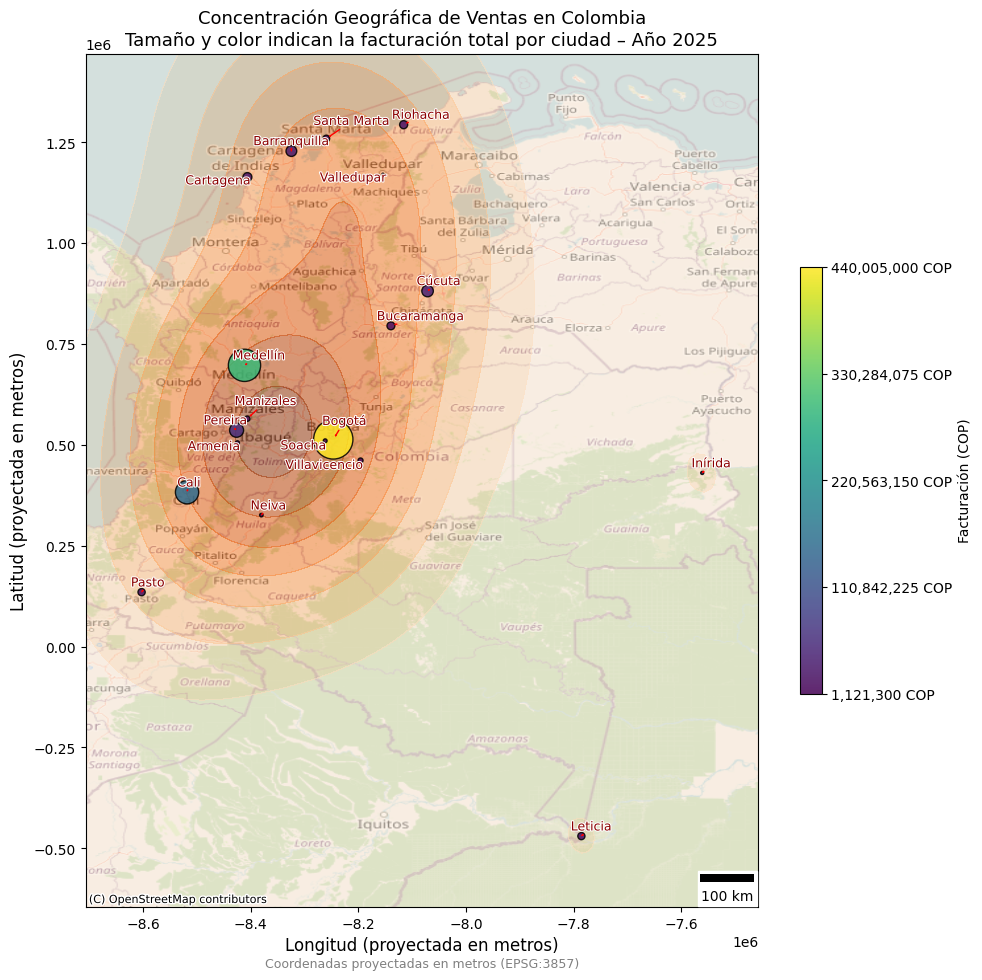

In [293]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from adjustText import adjust_text
from pyproj import Transformer
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors

# Transformar coordenadas a EPSG:3857
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
x_3857, y_3857 = transformer.transform(lats, lons)

# Tamaño de puntos proporcional a la facturación
tam_puntos = [f / max(facturaciones) * 800 for f in facturaciones]

# KDE de densidad
xy = np.vstack([x_3857, y_3857])
kde = gaussian_kde(xy)
xmin, xmax = min(x_3857), max(x_3857)
ymin, ymax = min(y_3857), max(y_3857)


# Crear figura
fig, ax = plt.subplots(figsize=(10, 10))

# Expansión de límites con padding
padding_x = (xmax - xmin) * 0.1
padding_y = (ymax - ymin) * 0.1
xlim = (xmin - padding_x, xmax + padding_x)
ylim = (ymin - padding_y, ymax + padding_y)

# Calcular KDE en la grilla alineada con el mapa base
X, Y = np.mgrid[xlim[0]:xlim[1]:100j, ylim[0]:ylim[1]:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Aplicar límites ANTES de agregar mapa base
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Mapa base alineado (usa los mismos límites)
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs='EPSG:3857',
    zoom=6
)

# Contornos de densidad
contour = ax.contourf(X, Y, Z, levels=8, cmap='Oranges', alpha=0.5)

# Scatter con color por facturación
scatter = ax.scatter(
    x_3857, y_3857,
    s=tam_puntos,
    c=facturaciones,
    cmap='viridis',
    alpha=0.85,
    edgecolor='black',
    # norm=colors.LogNorm()
)

# Etiquetas de ciudades con borde blanco
texts = []
for i, name in enumerate(nombres_tiendas):
    text = ax.text(x_3857[i], y_3857[i], name, fontsize=9, ha='right', color='darkred')
    text.set_path_effects([
        path_effects.Stroke(linewidth=1.5, foreground='white'),
        path_effects.Normal()
    ])
    texts.append(text)

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', color='red'))

# Colorbar con ticks claros y legibles
cbar = plt.colorbar(scatter, ax=ax, label='Facturación (COP)', shrink=0.5)
ticks = np.linspace(min(facturaciones), max(facturaciones), num=5)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{v:,.0f} COP' for v in ticks])

# Escala
scalebar = ScaleBar(1, units="m", location='lower right', scale_loc='bottom', length_fraction=0.1)
ax.add_artist(scalebar)

# Ejes
ax.set_xlabel("Longitud (proyectada en metros)", fontsize=12)
ax.set_ylabel("Latitud (proyectada en metros)", fontsize=12)
ax.tick_params(labelsize=10)

# Título y subtítulo (sin colisiones)
ax.set_title("Concentración Geográfica de Ventas en Colombia\nTamaño y color indican la facturación total por ciudad – Año 2025", fontsize=13)

# Pie de figura aclarando sistema de coordenadas
ax.annotate("Coordenadas proyectadas en metros (EPSG:3857)", xy=(0.5, -0.07), xycoords='axes fraction',
            ha='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()


A partir del mapa, se pueden identificar zonas geográficas con alta concentración de ventas, como el centro del país (Bogotá, Medellín), y algunas zonas periféricas como Leticia que muestran menores niveles de facturación. Esto nos permite ver patrones de venta concentrados en ciertas regiones, lo que puede estar influenciado por la infraestructura, la población, y el comportamiento del consumidor en esas áreas.

## 2. Mapa Interactivo de Ventas por Ciudad

Un mapa interactivo (creado con la biblioteca plotly) proporciona una visualización dinámica donde cada tienda es representada por un punto en el mapa. Al hacer clic sobre los puntos, se muestra la facturación total de la tienda y otras métricas de interés.

In [294]:
import plotly.express as px
import pandas as pd

# Preparar datos en DataFrame
df = pd.DataFrame({
    'Ciudad': nombres_tiendas,
    'Lat': lats,
    'Lon': lons,
    'Facturación': facturaciones
})

fig = px.scatter_mapbox(
    df,
    lat='Lat',
    lon='Lon',
    size='Facturación',
    color='Facturación',
    hover_name='Ciudad',
    hover_data={'Lat': True, 'Lon': True, 'Facturación': ':,.0f'},
    color_continuous_scale='Viridis',
    size_max=50,
    zoom=5,
    mapbox_style="open-street-map",
    title="Distribución Interactiva de Ventas por Ciudad"
)

fig.update_layout(
    margin={"r":0, "t":40, "l":0, "b":0},
    height=800
)

fig.show()


El mapa interactivo resalta las tiendas más grandes, como Bogotá, donde la facturación es significativamente mayor. También se observa que ciudades con menor tamaño o menos densidad poblacional, como Leticia, tienen ventas más bajas, lo que es coherente con las expectativas, ya que el volumen de consumidores en estas áreas puede ser más limitado.

## Patrones Geográficos y su Impacto en el Rendimiento de las Tiendas

Los mapas revelan patrones geográficos interesantes que pueden influir en el rendimiento de las tiendas:

# Concentración en el Centro del País
La mayoría de las ventas se concentran en el centro del país, especialmente en Bogotá y Medellín. Estas ciudades cuentan con una alta densidad de población, mejor infraestructura y mayor acceso al mercado, lo que resulta en un mayor volumen de ventas.

# Zonas Periféricas con Menor Rendimiento
Las ciudades periféricas, como Leticia, muestran ventas significativamente más bajas. Esto puede estar relacionado con factores como el acceso limitado a productos, menores poblaciones y distancias más largas para la distribución de productos.

# Factores Influyentes
La ubicación de las tiendas y la proximidad a áreas de alta densidad poblacional parecen ser factores clave que afectan directamente las ventas. Las tiendas ubicadas en grandes ciudades o áreas con mejor infraestructura de transporte tienden a tener un rendimiento superior.

## Conclusión

La exploración geográfica de las ventas a través de los mapas generados nos permite identificar de manera clara y visual cómo las ubicaciones influyen en el rendimiento de las tiendas. Los mapas de calor y los mapas interactivos proporcionan una visión detallada de las zonas más rentables y nos permiten entender las diferencias regionales en términos de ventas y facturación.

Al observar la distribución geográfica de las ventas, podemos concluir que Bogotá y Medellín están posicionadas como las tiendas más rentables, con una mayor densidad de ventas, mientras que tiendas en áreas más remotas, como Leticia, tienen un rendimiento inferior.

Estos hallazgos no solo son útiles para comprender el impacto geográfico en las ventas, sino que también brindan información valiosa para tomar decisiones estratégicas sobre la ubicación de futuras tiendas o ajustes en las campañas de marketing, optimización de inventarios y distribución.